In [6]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc

DATAFOLDER = '../data/'
IMAGE_FOLDER = DATAFOLDER + 'roof_images/'

In [7]:
df = pd.read_csv(DATAFOLDER + 'id_train.csv')
ids = list(df['Id'])
print(len(ids))
df.head()

8000


,Id,label
0,-3935637,4
1,-2815459,3
2,-2355684,3
3,-2343303,4
4,-1981985,2


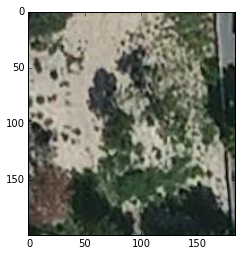

In [8]:
img_path = IMAGE_FOLDER + str(ids[0]) + '.jpg'
img = misc.imread(img_path)
plt.imshow(img)

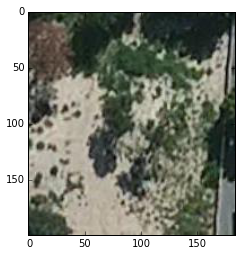

In [12]:
# horizontal flip
plt.imshow(img[::-1,:,:])

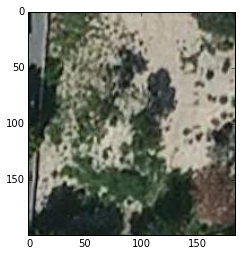

In [13]:
# Vertical flip
plt.imshow(img[:,::-1,:])

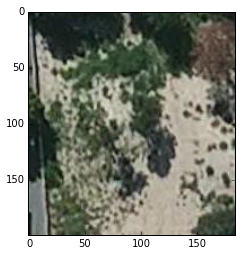

In [15]:
# Transpose
plt.imshow(img[::-1,::-1,:])